## Baseline danger metric
Development of baseline danger metric for a bike ride

In [1]:
import pandas as pd
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CRASHES_FILEPATH = "../../data/Motor_Vehicle_Collisions_-_Crashes.csv"

# Use helper funcs from .py files

In [3]:
import os
print(os.getcwd())

import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
print(sys.path)

/Users/conorlyman/school/aml/spoke/notebooks/conorlyman
['/Users/conorlyman/school/aml/spoke/notebooks/conorlyman', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python38.zip', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/lib-dynload', '', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/IPython/extensions', '/Users/conorlyman/.ipython', '/Users/conorlyman/school/aml/spoke']


In [4]:
from spoke.bike_route import BikeRoute

In [5]:
G = ox.graph_from_address("420 East 73rd Street, New York, New York 10021", network_type="bike", dist=1500)

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [6]:
starting_point_coord = (40.768998, -73.954808)
ending_point_coord = (40.771166, -73.964105)

In [7]:
bike_route = BikeRoute(G, starting_point_coord, ending_point_coord)

In [8]:
bike_route.get_route()

[42439567,
 42430075,
 6263083538,
 6176390171,
 42430068,
 42439563,
 42438802,
 42436489,
 42436486,
 42436484,
 42436481,
 596776057]

In [9]:
import spoke.crashes as crash_helpers

In [10]:
crashes_df = crash_helpers.get_crashes(CRASHES_FILEPATH)

/var/folders/q4/7911fbv57wv3c68srp1cdlkm0000gn/T/ipykernel_76659/548374056.py:1: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  crashes_df = crash_helpers.get_crashes(CRASHES_FILEPATH)


In [11]:
manhattan_crashes_df = crash_helpers.get_borough_crashes(crashes_df, "manhattan")
manhattan_crashes_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
30,04/16/2021,21:20,MANHATTAN,10025.0,40.793350,-73.972750,"(40.79335, -73.97275)",WEST 94 STREET,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4407958,Sedan,NaN,NaN,NaN,NaN
31,04/16/2021,17:20,MANHATTAN,10012.0,40.725380,-74.000110,"(40.72538, -74.00011)",PRINCE STREET,WOOSTER STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
70,04/16/2021,20:55,MANHATTAN,10032.0,40.841717,-73.944350,"(40.841717, -73.94435)",NaN,NaN,1051 RIVERSIDE DRIVE,...,Unspecified,NaN,NaN,NaN,4408280,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
80,04/15/2021,22:25,MANHATTAN,10036.0,40.760822,-73.998320,"(40.760822, -73.99832)",WEST 42 STREET,11 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4407830,Sedan,NaN,NaN,NaN,NaN
81,04/14/2021,10:09,MANHATTAN,10016.0,40.746080,-73.974945,"(40.74608, -73.974945)",2 AVENUE,EAST 36 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407282,Tow Truck / Wrecker,Dump,NaN,NaN,NaN


In [12]:
manhattan_bike_crashes_df = crash_helpers.get_bike_crashes(manhattan_crashes_df)

In [13]:
manhattan_bike_crashes_df["crash_node"] = crash_helpers.get_crash_nodes(G, manhattan_bike_crashes_df)

/var/folders/q4/7911fbv57wv3c68srp1cdlkm0000gn/T/ipykernel_76659/319154683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_bike_crashes_df["crash_node"] = crash_helpers.get_crash_nodes(G, manhattan_bike_crashes_df)


In [14]:
manhattan_bike_crashes_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,crash_node
501,04/01/2021,15:10,MANHATTAN,10016.0,40.740580,-73.978935,"(40.74058, -73.978935)",NaN,NaN,484 2 AVENUE,...,NaN,NaN,NaN,4408084,Sedan,Bike,NaN,NaN,NaN,42448813
846,04/17/2021,21:25,MANHATTAN,10022.0,40.757810,-73.973530,"(40.75781, -73.97353)",EAST 51 STREET,PARK AVENUE,NaN,...,NaN,NaN,NaN,4408436,Sedan,Bike,NaN,NaN,NaN,42440459
865,04/17/2021,19:37,MANHATTAN,10012.0,40.724968,-74.001580,"(40.724968, -74.00158)",NaN,NaN,415 WEST BROADWAY,...,NaN,NaN,NaN,4408181,Sedan,Bike,NaN,NaN,NaN,42448813
891,04/16/2021,10:00,MANHATTAN,10019.0,40.764626,-73.995550,"(40.764626, -73.99555)",11 AVENUE,WEST 48 STREET,NaN,...,NaN,NaN,NaN,4408438,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,8254176966
929,04/17/2021,17:50,MANHATTAN,10029.0,40.799984,-73.944855,"(40.799984, -73.944855)",EAST 116 STREET,MADISON AVENUE,NaN,...,NaN,NaN,NaN,4408507,E-Bike,NaN,NaN,NaN,NaN,42443046


In [15]:
route = bike_route.get_route()

In [16]:
route_crashes = crash_helpers.get_route_crashes(manhattan_bike_crashes_df, route)

In [17]:
num_node_crashes = crash_helpers.get_num_node_crashes(route_crashes)

In [18]:
bike_route.get_roads_at_node(42439563)

['primary', 'residential', 'residential', 'primary']

In [19]:
bike_route.count_road_types(42439563)

{'primary': 2, 'residential': 2}

In [20]:
node_crash_attrs = crash_helpers.get_node_crash_attributes(route_crashes, bike_route, G)

In [21]:
node_crash_attrs

{42439563: {'num_crashes': 10, 'primary': 2, 'residential': 2},
 42436489: {'num_crashes': 9, 'secondary': 4, 'primary': 2},
 42436481: {'num_crashes': 7, 'secondary': 6},
 42436486: {'num_crashes': 6, 'secondary': 4, 'primary': 2},
 42430068: {'num_crashes': 6, 'primary': 2, 'residential': 2},
 42439567: {'num_crashes': 5, 'primary': 2, 'residential': 2},
 42436484: {'num_crashes': 5, 'secondary': 6},
 42438802: {'num_crashes': 4, 'primary': 2, 'residential': 2},
 42430075: {'num_crashes': 2, 'residential': 2, 'primary': 2}}

In [22]:
node_crash_attrs_df = pd.DataFrame.from_dict(node_crash_attrs, orient="index").fillna(0)

In [23]:
node_crash_attrs_df

,num_crashes,primary,residential,secondary
42439563,10,2.0,2.0,0.0
42436489,9,2.0,0.0,4.0
42436481,7,0.0,0.0,6.0
42436486,6,2.0,0.0,4.0
42430068,6,2.0,2.0,0.0
42439567,5,2.0,2.0,0.0
42436484,5,0.0,0.0,6.0
42438802,4,2.0,2.0,0.0
42430075,2,2.0,2.0,0.0


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()
reg.fit(node_crash_attrs_df.drop("num_crashes", axis=1), node_crash_attrs_df["num_crashes"])

LinearRegression()

In [26]:
reg.coef_

array([ 0.975, -0.6  ,  0.225])

In [27]:
reg.intercept_

4.649999999999999

# Plot

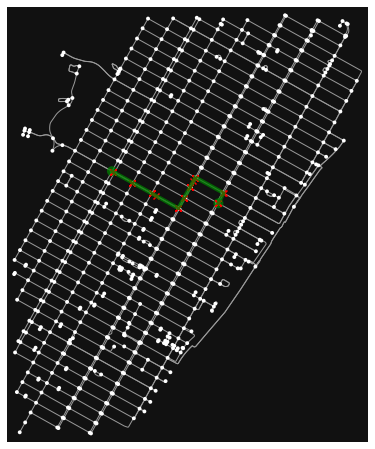

In [28]:
fig, ax = ox.plot_graph_route(G, route, route_color="green", route_alpha=0.75, show=False, close=False)
ax.scatter(route_crashes["LONGITUDE"], route_crashes["LATITUDE"], marker="x", c="red")
plt.show()

# Regression for all nodes in G

In [29]:
def _get_nearest_crash_node_dist(_x, _g):
    """
    Function to apply to a df to get closest node in a graph, _g
    """
    if not (np.isnan(_x["LONGITUDE"]) and np.isnan(_x["LATITUDE"])):
        return ox.distance.nearest_nodes(_g, _x["LONGITUDE"], _x["LATITUDE"], return_dist=True)[-1]
    return 1000

In [30]:
# Filter out nodes that are too far away - reduce edge effects
manhattan_bike_crashes_df["node_dist"] = manhattan_bike_crashes_df.apply(
    _get_nearest_crash_node_dist, args=(G, ), axis=1
)

/var/folders/q4/7911fbv57wv3c68srp1cdlkm0000gn/T/ipykernel_76659/2485230615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_bike_crashes_df["node_dist"] = manhattan_bike_crashes_df.apply(


In [31]:
manhattan_bike_crashes_df["node_dist"].describe()

count    1.452200e+04
mean     1.443431e+04
std      3.212026e+05
min      1.394892e-02
25%      1.000000e+03
50%      2.131679e+03
75%      3.798798e+03
max      8.663210e+06
Name: node_dist, dtype: float64

In [32]:
# The cutoff point here will have large implications for the regression
# How many meters is appropriate to apply as a cutoff?
# Also note that this is less necessary if/when we look at all of Manhattan as opposed to just a neighborhood
# There are also other ways we could filter for a neighborhood
g_manhattan_bike_crashes_df = manhattan_bike_crashes_df[manhattan_bike_crashes_df["node_dist"] < 10]

In [33]:
all_node_crash_attrs = crash_helpers.get_node_crash_attributes(
    g_manhattan_bike_crashes_df, bike_route, G
)

In [34]:
all_node_crash_attrs_df = pd.DataFrame.from_dict(all_node_crash_attrs, orient="index").fillna(0)

In [35]:
# 265 rows is not a lot of datapoints - more reason to train and predict on Manhattan as a whole?
all_node_crash_attrs_df

,num_crashes,primary,secondary,residential,cycleway,tertiary,unclassified,path,service
42436531,32,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
42424089,26,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
42442961,23,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
42442957,17,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
42440465,16,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
42440567,1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
42431674,1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
42436511,1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
7852760827,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


In [36]:
reg = LinearRegression()
reg.fit(all_node_crash_attrs_df.drop("num_crashes", axis=1), all_node_crash_attrs_df["num_crashes"])

LinearRegression()

In [37]:
reg.coef_

array([ 1.71888501,  0.31173237, -0.74737009, -0.17861481,  0.23559223,
        3.46995009,  0.60731663, -1.34064481])

In [38]:
reg.intercept_

3.7805475281547976

In [70]:
primary = all_node_crash_attrs_df["primary"]
x = all_node_crash_attrs_df.drop("num_crashes", axis=1)
y = all_node_crash_attrs_df["num_crashes"]


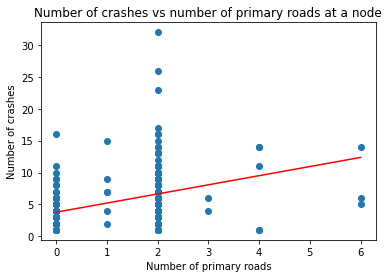

In [80]:
plt.figure()
plt.scatter(primary, y)
plt.title("Number of crashes vs number of primary roads at a node")
plt.xlabel("Number of primary roads")
plt.ylabel("Number of crashes")
# plt.scatter(primary, x.dot(reg.coef_))
plt.plot(
    [x.min()["primary"], x.max()["primary"]],
    [x.min().dot(reg.coef_) + reg.intercept_, x.max().dot(reg.coef_) + reg.intercept_],
    color="red"
)

plt.show()

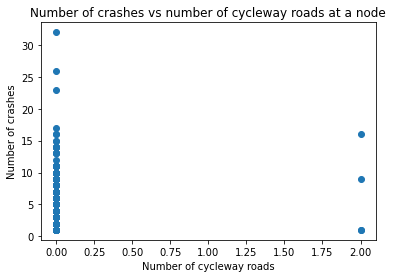

In [40]:
plt.figure()
plt.scatter(all_node_crash_attrs_df["cycleway"], all_node_crash_attrs_df["num_crashes"])
plt.title("Number of crashes vs number of cycleway roads at a node")
plt.xlabel("Number of cycleway roads")
plt.ylabel("Number of crashes")
plt.show()

# Normalize data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
normalized_crashes = scaler.fit_transform(all_node_crash_attrs_df)

In [44]:
normalized_crashes = pd.DataFrame(normalized_crashes, columns=all_node_crash_attrs_df.columns)

In [45]:
reg_normalized = LinearRegression()
reg_normalized.fit(normalized_crashes.drop("num_crashes", axis=1), normalized_crashes["num_crashes"])

LinearRegression()

In [52]:
reg_normalized.coef_

array([ 0.47515535,  0.12748836, -0.18401931, -0.01010081,  0.014511  ,
        0.04933823,  0.01727052, -0.10829088])

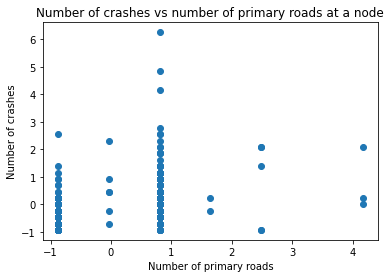

In [47]:
plt.figure()
plt.scatter(normalized_crashes["primary"], normalized_crashes["num_crashes"])
plt.title("Number of crashes vs number of primary roads at a node")
plt.xlabel("Number of primary roads")
plt.ylabel("Number of crashes")
plt.show()

# Pearson Correlation

In [49]:
from scipy import stats

In [50]:
# Does this correlation and P-value mean that there is some positive correlation for primary roads and crashes?
stats.pearsonr(all_node_crash_attrs_df["primary"], all_node_crash_attrs_df["num_crashes"])

(0.43870580433682327, 6.833223742305763e-14)

In [51]:
stats.pearsonr(all_node_crash_attrs_df["cycleway"], all_node_crash_attrs_df["num_crashes"])

(0.0491569266036665, 0.42549989352477785)